##### MINI batch
##### epoch batch-size iteration= epoch/batch-size
##### dataLoader
- shuff:打乱数据
- loader ：分组（batch）
- 
- 

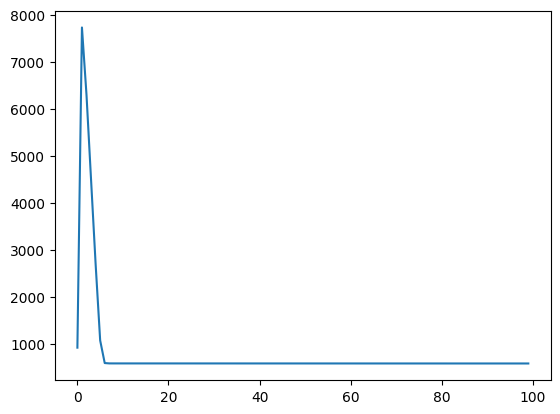

In [6]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#导入数据
trainData = pd.read_csv('D:/dataset/titanic/train.csv')
#将label和input（数值型数据）都提取出来
label = trainData['Survived']
inputs = trainData[['Pclass','SibSp','Parch','Fare']]
y = torch.from_numpy(label.values)
x = torch.from_numpy(inputs.values)
x = x.float()#不这么写会有数据类型的错误
y = y.float()
#模型
#继承自module
class Titaninc_num(torch.nn.Module):
    
    #构造函数，初始化对象
    def __init__(self):
        #不用管就是这么写（调用父类）
        super(Titaninc_num,self).__init__()
        #构造对象（输入维度和输出维度都是1）
        #nn就是neura network
        #多维特征的输入需要这么写
        self.activate = torch.nn.ELU()
        self.sigmoid = torch.nn.Sigmoid()
        self.linear1 = torch.nn.Linear(4,2)
        self.linear2 = torch.nn.Linear(2,1)

    #只能叫forward，前馈过程中执行的计算      
    def forward(self,x):
        
        #定义了可调用的对象
        #这里就只构建一层神经网络试试看
        y_pred = self.activate(self.linear1(x))
        y_pred = self.sigmoid(self.linear2(y_pred))
        y_pred = y_pred.squeeze(-1)
        return y_pred
    
    #没有backward，module会自动实现
    
model = Titaninc_num()

criterion = torch.nn.BCELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr = 0.002)

epoch_list = []
l_list = []
for epoch in range(100):
    y_pred = model(x)
    loss = criterion(y_pred, y)
    #print(epoch,loss.item())
    epoch_list.append(epoch)
    l_list.append(loss.data.item())
    
    #梯度归零，防止累加
    optimizer.zero_grad()
    #反向传播
    loss.backward()
    #更新
    optimizer.step()

plt.plot(np.array(epoch_list),np.array(l_list))